In [2]:
library(gplots)
library(ggplot2)
library(ape)
library(phylolm);


Attaching package: 'gplots'


The following object is masked from 'package:stats':

    lowess




In [3]:
#Treat SL as 0 and SM as 1
species = c('Trichechus_manatus','Equus_caballus','Canis_lupus','Spermophilus_dauricus','Ursus_maritimus','Pteropus_vampyrus','Elephantulus_edwardii','Sus_scrofa','Odocoileus_virginianus','Oryctolagus_cuniculus','Ovis_aries','Lemur_catta','Tupaia_chinensis','Enhydra_lutris','Felis_catus','Cavia_porcellus')
coneType = c(0,0,1,1,0,1,0,0,1,1,0,0,0,0,0,1)
traitF <- data.frame(species = species, coneType = coneType)
rownames(traitF) <- traitF$species
traitM <- as.matrix(traitF)
traitM

,species,coneType
Trichechus_manatus,Trichechus_manatus,0
Equus_caballus,Equus_caballus,0
Canis_lupus,Canis_lupus,1
Spermophilus_dauricus,Spermophilus_dauricus,1
Ursus_maritimus,Ursus_maritimus,0
Pteropus_vampyrus,Pteropus_vampyrus,1
Elephantulus_edwardii,Elephantulus_edwardii,0
Sus_scrofa,Sus_scrofa,0
Odocoileus_virginianus,Odocoileus_virginianus,1
Oryctolagus_cuniculus,Oryctolagus_cuniculus,1


In [4]:
zoonomiaPath = '/Users/tinaryu/brain_epigenetics/project/data/Zoonomia_ChrX_lessGC40_241species_30Consensus.tree'
zoonomiaTree <- read.tree(file = zoonomiaPath)
removeSpecV <- setdiff(zoonomiaTree$tip.label,species)

zoonomiaTreeDrop <- drop.tip(zoonomiaTree,removeSpecV)
zoonomiaTreeDrop$tip.label

[1] "Trichechus_manatus"     "Elephantulus_edwardii"  "Oryctolagus_cuniculus" 
 [4] "Cavia_porcellus"        "Spermophilus_dauricus"  "Tupaia_chinensis"      
 [7] "Lemur_catta"            "Pteropus_vampyrus"      "Sus_scrofa"            
[10] "Odocoileus_virginianus" "Ovis_aries"             "Equus_caballus"        
[13] "Felis_catus"            "Canis_lupus"            "Ursus_maritimus"       
[16] "Enhydra_lutris"

In [5]:
#this may take a minute

pathPeak = '/Users/tinaryu/brain_epigenetics/project/data/L23ITpeakPredM.csv'
pathSpecies = '/Users/tinaryu/brain_epigenetics/project/data/L23ITspeciesNames.csv'

speciesInfoF <- read.csv(file=pathSpecies,stringsAsFactors=F,header=T);
peakInfoF <- read.csv(file=pathPeak,header=TRUE,stringsAsFactors=F);


In [6]:
#only keep the species with trait annotation for the peak table
rownames(peakInfoF) <- peakInfoF$X
peakInfoSubsetF = peakInfoF[,species,drop=FALSE]
peakInfoSubsetM = as.matrix(peakInfoSubsetF)
peakInfoSubsetM[1:5,]

,Trichechus_manatus,Equus_caballus,Canis_lupus,Spermophilus_dauricus,Ursus_maritimus,Pteropus_vampyrus,Elephantulus_edwardii,Sus_scrofa,Odocoileus_virginianus,Oryctolagus_cuniculus,Ovis_aries,Lemur_catta,Tupaia_chinensis,Enhydra_lutris,Felis_catus,Cavia_porcellus
hg38:chr1:827294-827795,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,0.896454,NA,NA,NA,NA
hg38:chr1:1019232-1019733,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
hg38:chr1:2414331-2414832,NA,0.1736450,0.274206,0.690077,0.389811,0.970039,NA,NA,0.874791,NA,0.276168,NA,0.946244,0.858548,NA,0.924502
hg38:chr1:32886478-32886979,0.946243,0.9631820,0.286944,0.439608,0.489087,0.971063,0.907109,0.940642,0.930320,0.942203,0.161447,0.702246,0.350648,0.798215,0.219556,NA
hg38:chr3:51340395-51340896,0.933330,0.0719499,NA,0.849795,NA,0.103207,NA,0.956646,0.936982,0.975540,0.856439,0.922376,0.945567,NA,0.871231,NA


In [7]:
#only keep the rows with no missing values 322000 rows -> 26000 rows
peakInfoSubsetOmitM <- as.matrix(na.omit(peakInfoSubsetF))
peakInfoSubsetOmitF <- as.data.frame(peakInfoSubsetOmitM)

In [8]:
########## Loop through the peaks and calculate dichromacy relationship with phylolm ###############
#This could take a few minutes

testPeaksV <- rownames(peakInfoSubsetOmitF);

loopPeaksV <- testPeaksV;

peakPhyloResultsF <- data.frame(peakId = loopPeaksV, pvalue=rep(NA,length(loopPeaksV)),correlation=rep(NA,length(loopPeaksV)),adjCorrelation=rep(NA,length(loopPeaksV)));

rownames(peakPhyloResultsF) <- peakPhyloResultsF$peakId


options(warn=-1)

for(curPeak in loopPeaksV) {
    traitFtmp <- traitF;
    traitFtmp$curPeak <- peakInfoSubsetOmitM[curPeak,];
    
    curLmFit = phylolm(curPeak~coneType,data=traitFtmp,phy=zoonomiaTreeDrop,model="BM");
    curLmFitSum <- summary(curLmFit)
    peakPhyloResultsF[curPeak,"pvalue"] <- curLmFitSum$coefficients["coneType","p.value"]
    peakPhyloResultsF[curPeak,"correlation"] <- curLmFitSum$r.squared
    peakPhyloResultsF[curPeak,"adjCorrelation"] <- curLmFitSum$adj.r.squared

} 

options(warn=0)


In [9]:
peakPhyloResults2F <- peakPhyloResultsF[order(peakPhyloResultsF$pvalue,decreasing=F),]

In [10]:
peakPhyloResults2F

,peakId,pvalue,correlation,adjCorrelation
,<chr>,<dbl>,<dbl>,<dbl>
rn6:chr9:82649262-82649762:250,rn6:chr9:82649262-82649762:250,2.076689e-07,0.8624892,0.8526670
rn6:chr18:27659000-27659500:250,rn6:chr18:27659000-27659500:250,6.005609e-07,0.8402198,0.8288069
rheMac10:chr1:123650393-123650893:250,rheMac10:chr1:123650393-123650893:250,1.481245e-06,0.8185165,0.8055534
rn6:chr18:69550621-69551121:250,rn6:chr18:69550621-69551121:250,1.798091e-06,0.8134909,0.8001688
mm10:chr2:142647883-142648384,mm10:chr2:142647883-142648384,2.366027e-06,0.8061396,0.7922924
rn6:chr2:211226830-211227330:250,rn6:chr2:211226830-211227330:250,4.366673e-06,0.7886859,0.7735920
mm10:chr2:65929897-65930398,mm10:chr2:65929897-65930398,5.863154e-06,0.7797527,0.7640207
rheMac10:chr14:69380993-69381493:250,rheMac10:chr14:69380993-69381493:250,7.010794e-06,0.7741545,0.7580227
rn6:chr9:82647113-82647613:250,rn6:chr9:82647113-82647613:250,7.608047e-06,0.7715481,0.7552301


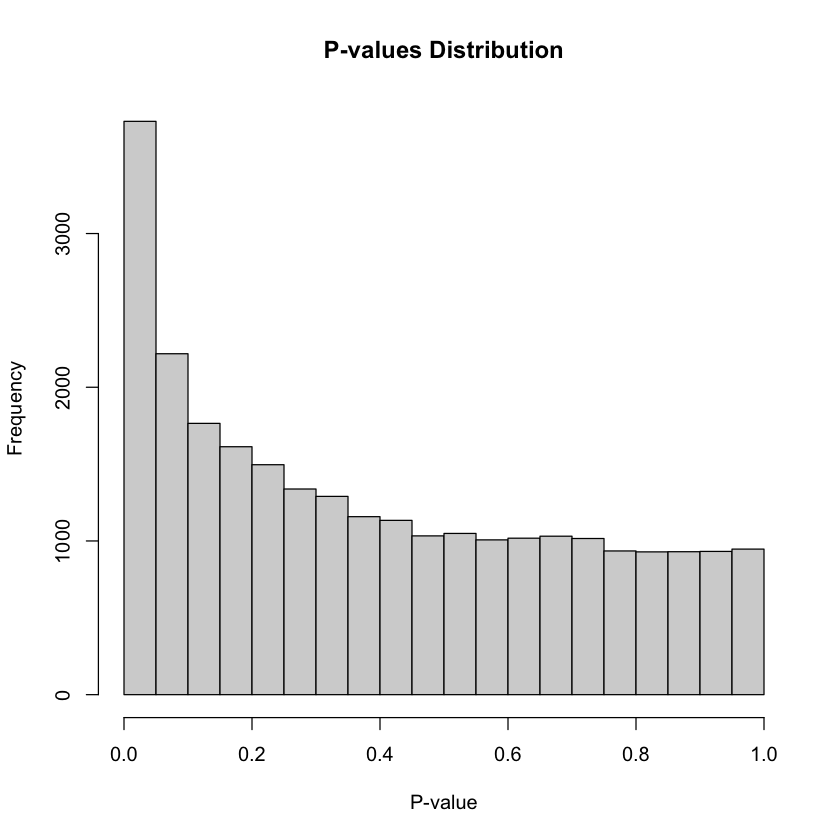

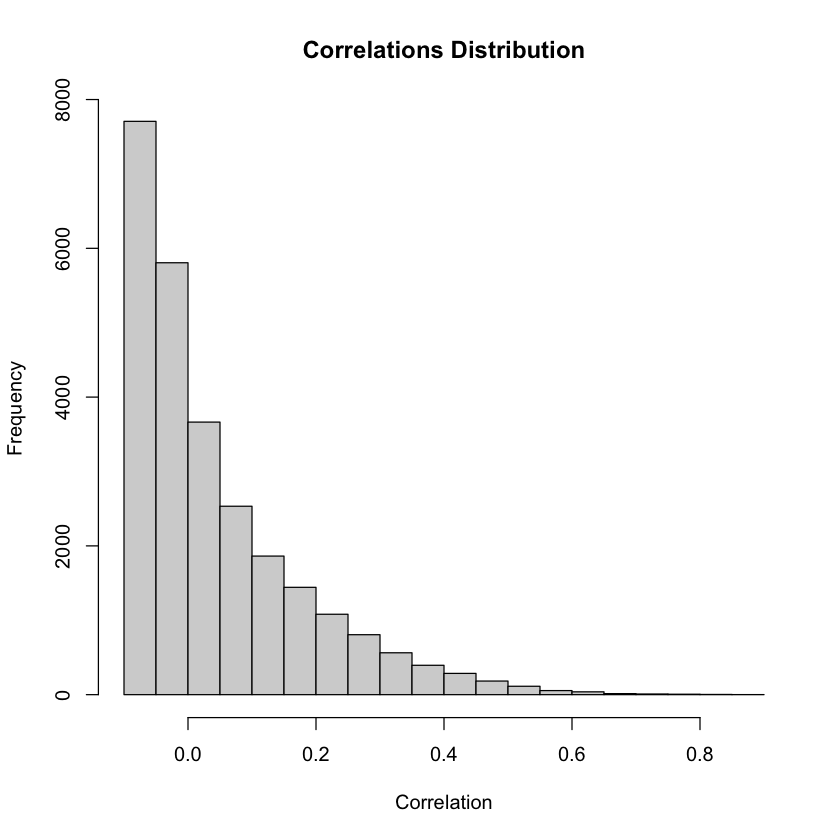

In [11]:
hist(peakPhyloResults2F$pvalue, main = "P-values Distribution", xlab = "P-value")
hist(peakPhyloResults2F$adjCorrelation, main = "Correlations Distribution", xlab = "Correlation")

What do those histograms tell you about the statistical tests you conduct?

In [12]:
#add multiple testing correction
peakPhyloResults2F$adjPvalue <- p.adjust(peakPhyloResults2F$pvalue,method="BH")

In [13]:
library(dplyr)
peakPhyloResultsFiltered2F <- peakPhyloResults2F %>% filter(grepl("hg38", peakId))


Attaching package: 'dplyr'


The following object is masked from 'package:ape':

    where


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [16]:
# Load the necessary libraries
library(dplyr)
library(tidyr)
# Split the peakId into separate columns for chrom, start, and end using tidyr::separate
Allpeaks <- peakPhyloResultsFiltered2F %>%
  separate(peakId, into = c("genome", "chrom", "position"), sep = ":") %>%
  separate(position, into = c("start", "end"), sep = "-", convert = TRUE)

# Create the BED file format (chrom, start, end)
bed_Allpeaks <- Allpeaks  %>%
  select(chrom, start, end)

write.table(bed_Allpeaks, "Results/L23IT/All.bed", sep = "\t", row.names = FALSE, col.names = FALSE, quote = FALSE)

In [17]:
peakPhyloResultsFilteredPositiveF <- peakPhyloResultsFiltered2F %>% filter(adjCorrelation>0)
peakPhyloResultsFilteredNegativeF <- peakPhyloResultsFiltered2F %>% filter(adjCorrelation<0)

write.csv(peakPhyloResultsFilteredPositiveF, file = "Results/L23IT/PhyloResultsHg38Positive.csv",row.names = FALSE)
write.csv(peakPhyloResultsFilteredNegativeF, file = "Results/L23IT/PhyloResultsHg38Negative.csv",row.names = FALSE)

In [18]:
top200Positive <- peakPhyloResultsFilteredPositiveF[1:200,]
top200Negative <- peakPhyloResultsFilteredNegativeF[1:200,]

In [19]:
# Load the necessary libraries
library(dplyr)
library(tidyr)

# Split the peakId into separate columns for chrom, start, and end using tidyr::separate
top200PositiveBed <- top200Positive %>%
  separate(peakId, into = c("genome", "chrom", "position"), sep = ":") %>%
  separate(position, into = c("start", "end"), sep = "-", convert = TRUE)

# Create the BED file format (chrom, start, end)
bed_data_pos <- top200PositiveBed  %>%
  select(chrom, start, end)

write.table(bed_data_pos, "Results/L23IT/Top200Pos.bed", sep = "\t", row.names = FALSE, col.names = FALSE, quote = FALSE)

In [20]:
# Split the peakId into separate columns for chrom, start, and end using tidyr::separate
top200NegativeBed <- top200Negative %>%
  separate(peakId, into = c("genome", "chrom", "position"), sep = ":") %>%
  separate(position, into = c("start", "end"), sep = "-", convert = TRUE)

# Create the BED file format (chrom, start, end)
bed_data_neg <- top200NegativeBed  %>%
  select(chrom, start, end)

write.table(bed_data_neg, "Results/L23IT/Top200Neg.bed", sep = "\t", row.names = FALSE, col.names = FALSE, quote = FALSE)